In [1]:
import os
import sys
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

In [2]:
import matplotlib.pyplot as plt 

In [3]:
np.random.seed(42)

n_samples = 1000
n_features = 2 
random_state = 42

In [4]:
X, _ = make_blobs(n_samples=n_samples,
                    n_features=n_features,
                    centers=5,
                    random_state=random_state)

# X[-1] = [5.0, -7.5]

In [5]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [6]:
from utils import LocalOutlierFactor as cuLocalOutlierFactor

clf = cuLocalOutlierFactor(n_neighbors=20)
clf.fit(X)

In [7]:
cu_scores = clf.negative_outlier_factor_

In [9]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit(X)

LocalOutlierFactor()

In [10]:
sk_scores = clf.negative_outlier_factor_

In [12]:
scores = {'cuml': cu_scores, 'sklearn': sk_scores}

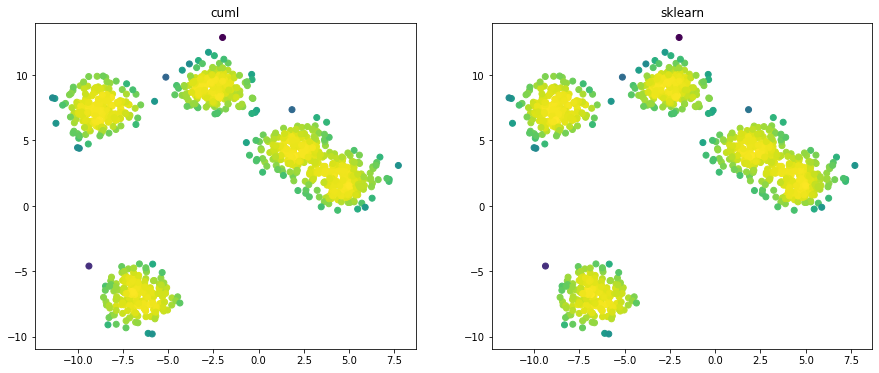

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for score, ax in zip(scores, axes): 
    ax.scatter(X[:,0], X[:,1], c=scores[score])
    ax.set_title(score)
fig.savefig("cuml_sklearn_lof.pdf", bbox_inches='tight')